## CS 4304
### Assignment #7
### Dylan Ellsworth 201329133
### Nov. 16, 2021

In this assignment we gain experience working with Seaborn, kernel density estimation and widgets through the ipwidgets library. 

Question 1: Recreate the figure showing the Gold-medal winning heights at the 2016 Olympics.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

In [3]:
df = pd.read_csv('olympic_athletes.csv')
sports = ['Swimming','Wrestling','Fencing','Athletics','Shooting','Cycling','Rowing','Gymnastics']
df = df[df['Sport'].isin(sports)]
df = df[df['Year']==2016]
df = df.dropna(subset=['Height'])
df = df.drop_duplicates(subset=['Name'],keep='first')
df = df[df['Medal'] == 'Gold']
df


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2926,1634,Taha Akgl,M,25.0,192.0,125.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Gold
3020,1682,Morolake Akinosun,F,22.0,163.0,61.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Gold
3306,1858,Fehaid Al-Deehani,M,49.0,178.0,95.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,Gold
4383,2497,Artur Aleksanyan,M,24.0,190.0,98.0,Armenia,ARM,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Heavyweight, Greco-Roman",Gold
8969,4928,Katie Louise Archibald,F,22.0,178.0,70.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,Cycling Women's Team Pursuit,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262213,131193,Anita Wodarczyk,F,30.0,178.0,95.0,Poland,POL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Hammer Throw,Gold
264454,132340,Koji Yamamuro,M,27.0,159.0,58.0,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Gold
265216,132729,Hassan Aliazam Yazdanicharati,M,21.0,181.0,74.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Freestyle",Gold
265365,132795,Yana Karapetovna Yegoryan,F,22.0,175.0,64.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Women's Sabre, Individual",Gold


Text(0.5, 1.0, 'Gold-medal Winning Heights at the 2016 Olympics')

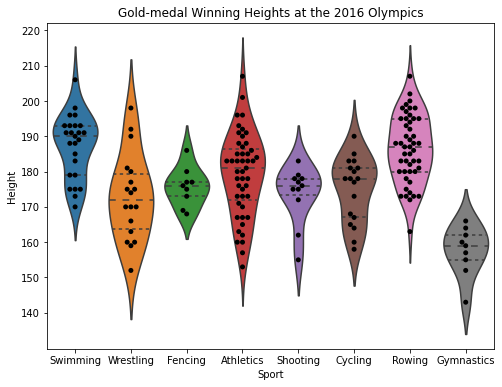

In [4]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Sport',y='Height',data=df,inner='quartile',scale='width',order=['Swimming','Wrestling','Fencing','Athletics','Shooting','Cycling','Rowing','Gymnastics'])
sns.swarmplot(x='Sport',y='Height',color='black',data=df,order=['Swimming','Wrestling','Fencing','Athletics','Shooting','Cycling','Rowing','Gymnastics'])
plt.yticks(ticks=[140,150,160,170,180,190,200,210,220])
plt.title('Gold-medal Winning Heights at the 2016 Olympics')

Question 2: Create a heat map of the distribution of gold-medal winners from 2006-2016,using bins. Have a drop-down box to specify the sport, and two check boxes: kernel density estimation and display data points.

In [5]:
df2 = pd.read_csv('olympic_athletes.csv')
df2 = df2[df2['Year'] >= 2000]
df2 = df2[df2['Year'] <= 2016]
df2 = df2[df2['Medal'] =='Gold']
df2 = df2.dropna(subset=['Height'])
df2 = df2.dropna(subset=['Weight'])
df2 = df2.drop_duplicates(subset=['Name'],keep='first')
df2
#df2 = df2[['Height','Weight','Sport']].groupby(['Sport']).count().reset_index()
#df2
#df2 = df2.pivot

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
172,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold
178,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold
200,93,Jol Marc Abati,M,38.0,190.0,85.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270609,135343,Aleksandr Yuryevich Zubkov,M,39.0,189.0,102.0,Russia-1,RUS,2014 Winter,2014,Winter,Sochi,Bobsleigh,Bobsleigh Men's Two,Gold
270934,135488,Nataliya Vladimirovna Zuyeva,F,19.0,176.0,62.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold
270970,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,39.0,183.0,100.0,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's Discus Throw,Gold
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold


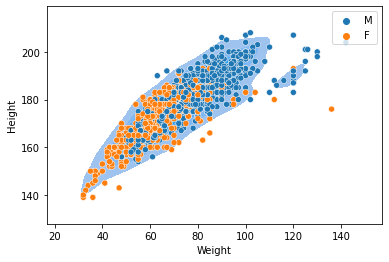

In [6]:
@interact(Sports = (['Combined']+['Swimming','Wrestling','Fencing','Athletics','Shooting','Cycling','Rowing','Gymnastics']),kde=True,display_data=True)
def f(Sports,kde,display_data):
    
    df3 = df2[df2.Sport == Sports]
    if (Sports == 'Combined'):
        df3 = df2[df2.Sport.isin(['Swimming','Wrestling','Fencing','Athletics','Shooting','Cycling','Rowing','Gymnastics'])]   
    if (kde):
        sns.kdeplot(x='Weight',y='Height',data=df3,fill=True)
        if (display_data):
            sns.scatterplot(x='Weight',y='Height',data=df3,hue='Sex')
            plt.legend(loc='upper right')
    else:
        sns.histplot(df3,x='Weight',y='Height',bins=(20))
        plt.xticks(ticks=[20,40,60,80,100,120,140])
        plt.yticks(ticks=[130,140,150,160,170,180,190,200,210,220])
    

        
    
    